In [3]:
#Discription:
#The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship.the data consist of diffrent parameter.
#the target is to pridict the servival of the pasanger on the ship depend on diffrent features.
#this is basically a classification problem.

In [636]:
#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

#Outliers lib:
from scipy import stats

#multicollinarity lib:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model building lib:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

#model cross validation lib:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score

#hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Error lib
import warnings
warnings.filterwarnings('ignore')

In [551]:
#Loading the Dataset:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [552]:
pd.set_option('display.max_rows',None)

In [553]:
df.shape

(891, 12)

In [554]:
#there is 891 rows and 12 columns is availble in the data

In [555]:
df.info()
#here we can see that we have total 11 features with datatype float64,int,object and 1 label with int datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [556]:
#checking the null value in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [557]:
#Here we can see than we have two null features
#Age: 177
#Cabin: 687
#Embarked : 2
#As the cabin feature has more than 50% of null values so it is better to delete the feature insted of replacing with some value.

In [558]:
#dropping the feature Cabin having more than 50% null value
df=df.drop(columns='Cabin',axis=1)

In [559]:
#taking the mean of the age feature to replace the null value with the mean value
#df['Age']=df['Age'].replace(np.nan,df['Age'].mean())
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [560]:
#replacing the nan value with the most frquent catagory
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [561]:
#checking the null value in the dataframe
df.isnull().sum()
#As we can have replaced all the nan values with some values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [562]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [563]:
#Dropping the columns Name as is has all the name values and it is not useful for the model building
df=df.drop(columns='Name',axis=1)

In [564]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [565]:
df['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
3101295               6
347088                6
CA 2144               6
382652                5
S.O.C. 14879          5
17421                 4
LINE                  4
W./C. 6608            4
4133                  4
2666                  4
347077                4
113760                4
349909                4
PC 17757              4
19950                 4
113781                4
239853                3
35273                 3
363291                3
345773                3
24160                 3
347742                3
PC 17582              3
SC/Paris 2123         3
PC 17755              3
F.C.C. 13529          3
PC 17760              3
C.A. 34651            3
248727                3
230080                3
110152                3
110413                3
371110                3
13502                 3
29106                 3
C.A. 31921            3
PC 17572              3
2627                  2
2908            

In [566]:
#ohe=OneHotEncoder()
#df1=pd.DataFrame(ohe.fit_transform(df[['Ticket']]).toarray())

In [567]:
#df=df.join(df1)

In [568]:
#as we can see the feature column Ticket is not looks useful so we are dropping the column
df=df.drop(columns='Ticket',axis=1)

In [569]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [570]:
#using the label encoder to relpace the sex catagorical values.
lb=LabelEncoder()
df_s=lb.fit_transform(df['Sex'])

In [571]:
#replacing the transfromed value to the feature sex column
df['Sex']=df_s

In [572]:
#checking the values after replace
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [573]:
#'Embarked'
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [574]:
#using get dummies method to perform the encoding on Embarked feature column
df1=pd.get_dummies(df[['Embarked']],drop_first=False)

In [575]:
#joining the column with the original dataframe
df=df.join(df1)

In [576]:
#deleting the Embarked feature after encoding the column
df=df.drop(columns='Embarked',index=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,7.2500,0,0,1
2,3,1,3,0,26.000000,0,0,7.9250,0,0,1
3,4,1,1,0,35.000000,1,0,53.1000,0,0,1
4,5,0,3,1,35.000000,0,0,8.0500,0,0,1
5,6,0,3,1,29.699118,0,0,8.4583,0,1,0


In [577]:
#describe the dataframe
df.iloc[:,:8].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,446.498876,0.383146,2.310112,0.648315,29.689791,0.522472,0.382022,32.160299
std,257.067114,0.486427,0.835388,0.477765,13.006343,1.103247,0.806409,49.704073
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.250000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.903100
50%,446.500000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [578]:
#here we can see that standred daviation is looks not normal.
#the mean and median(50%) looks normal means less chance of outliers.

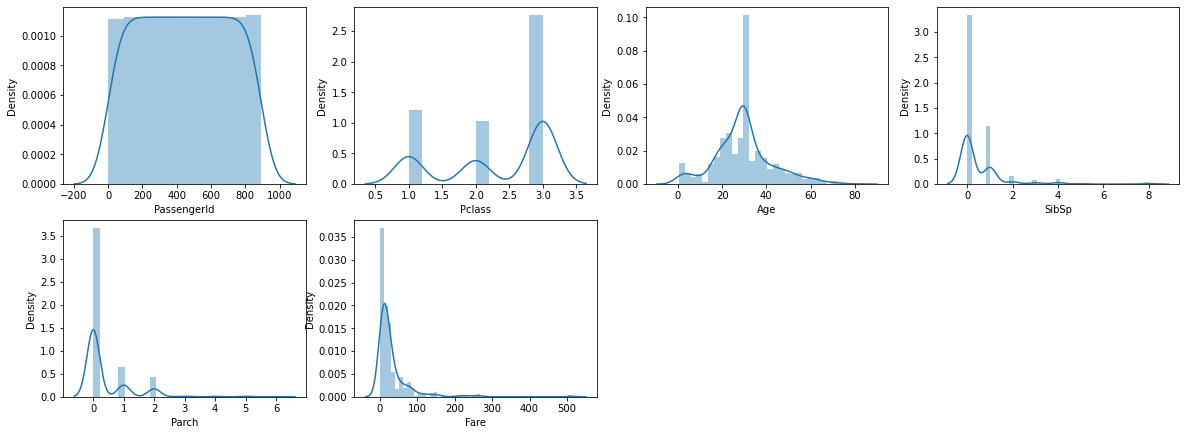

In [579]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,[0,2,4,5,6,7]]:
    if pltnum <= 30:
        plt.subplot(4,4,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [580]:
#we can see that there is outliers avaliable at the features parch,fare,age and sibsp

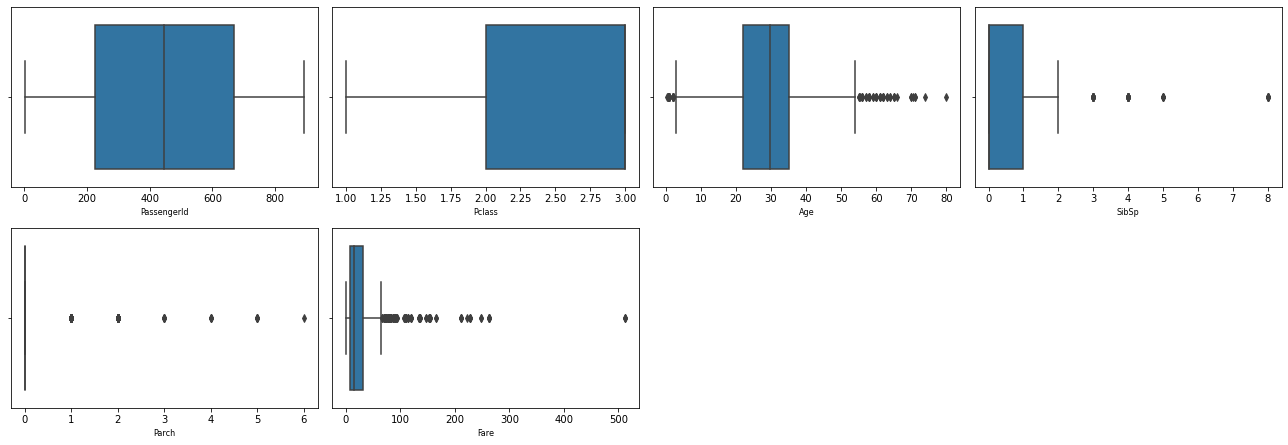

In [581]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,[0,2,4,5,6,7]]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.boxplot(df[columns],orient='v')
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [582]:
#using the IQR method for the quantile remove.
q1=df.iloc[:,[4,5,6,7]].quantile(0.25)
q3=df.iloc[:,[4,5,6,7]].quantile(0.75)

iqr=q3-q1

In [583]:
for column in df.iloc[:,[4,5,6,7]]:
    indexq=np.where(df[column] > (q3[column] + (1.5 * iqr[column])))
    
for column in df.iloc[:,[4]]:
    indexq=np.where(df[column] < (q3[column] - (1.5 * iqr[column])))    

In [584]:
indexq

(array([  6,   8,   9,  13,  15,  21,  23,  38,  42,  49,  57,  58,  62,
         77, 110, 118, 124, 146, 163, 164, 170, 171, 181, 182, 183, 192,
        204, 232, 236, 260, 277, 296, 304, 339, 347, 351, 373, 380, 385,
        406, 418, 434, 444, 445, 447, 468, 478, 479, 488, 529, 534, 540,
        541, 548, 617, 633, 641, 643, 682, 685, 688, 690, 719, 730, 749,
        750, 754, 776, 779, 786, 787, 801, 802, 812, 818, 823, 826, 829,
        830, 849, 851, 868, 874], dtype=int64),)

In [585]:
df=df.drop(df.index[indexq])

In [586]:
df.shape

(807, 11)

In [587]:
#Data Loss in percentage
loss_percentage=(891-807)/891*100
print(loss_percentage)

9.427609427609427


In [ ]:
#i have checked all the 3 methods i.e IQR,quantile and z-score.
#Here IQR is best to remove outlier and proide the best accuracy.so i am using the IQR method.

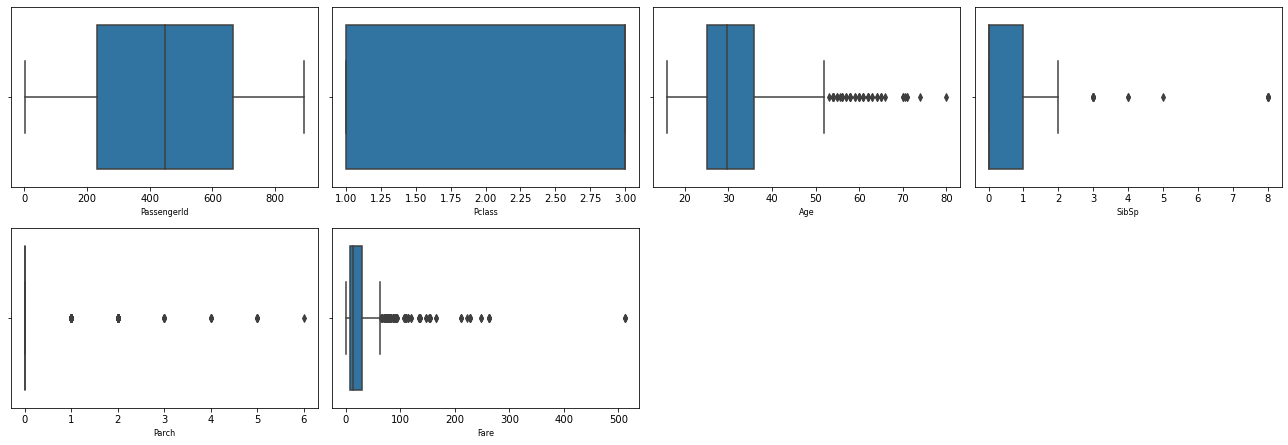

In [588]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,[0,2,4,5,6,7]]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.boxplot(df[columns],orient='v')
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [589]:
#checking the skewness and correlation between the featues and labels
corr=df.iloc[:,[0,1,2,4,5,6,7]].abs().corr()
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.277552
Parch          0.057427
Age            0.017033
SibSp          0.010461
PassengerId   -0.013414
Pclass        -0.356097
Name: Survived, dtype: float64

In [ ]:
#as we can see there is no skewness in the data as all the columns are inbetween -0.5 to +0.5 range.
#so there is no need to remove the skewness from the dataframe.

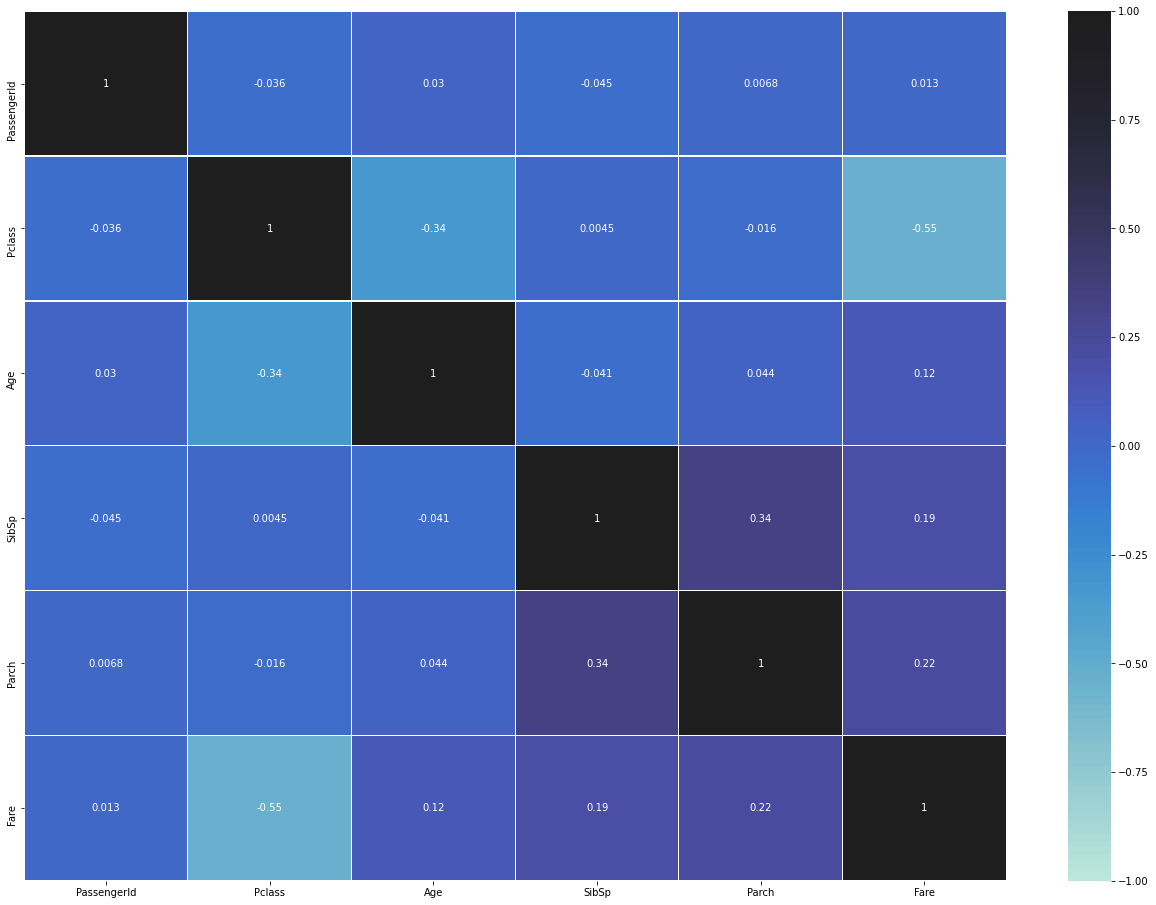

In [590]:
#using the heatmap to check the correlation between features.
corr_matrix=df.iloc[:,[0,2,4,5,6,7]].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [ ]:
#in heatmap we can see that there is no multicollinarity issue in the feature.
#still we can cross check the same using vif

In [591]:
#seprarting the x and y
x=df.drop(columns='Survived',axis=1)
y=df['Survived']

In [592]:
x.shape

(807, 10)

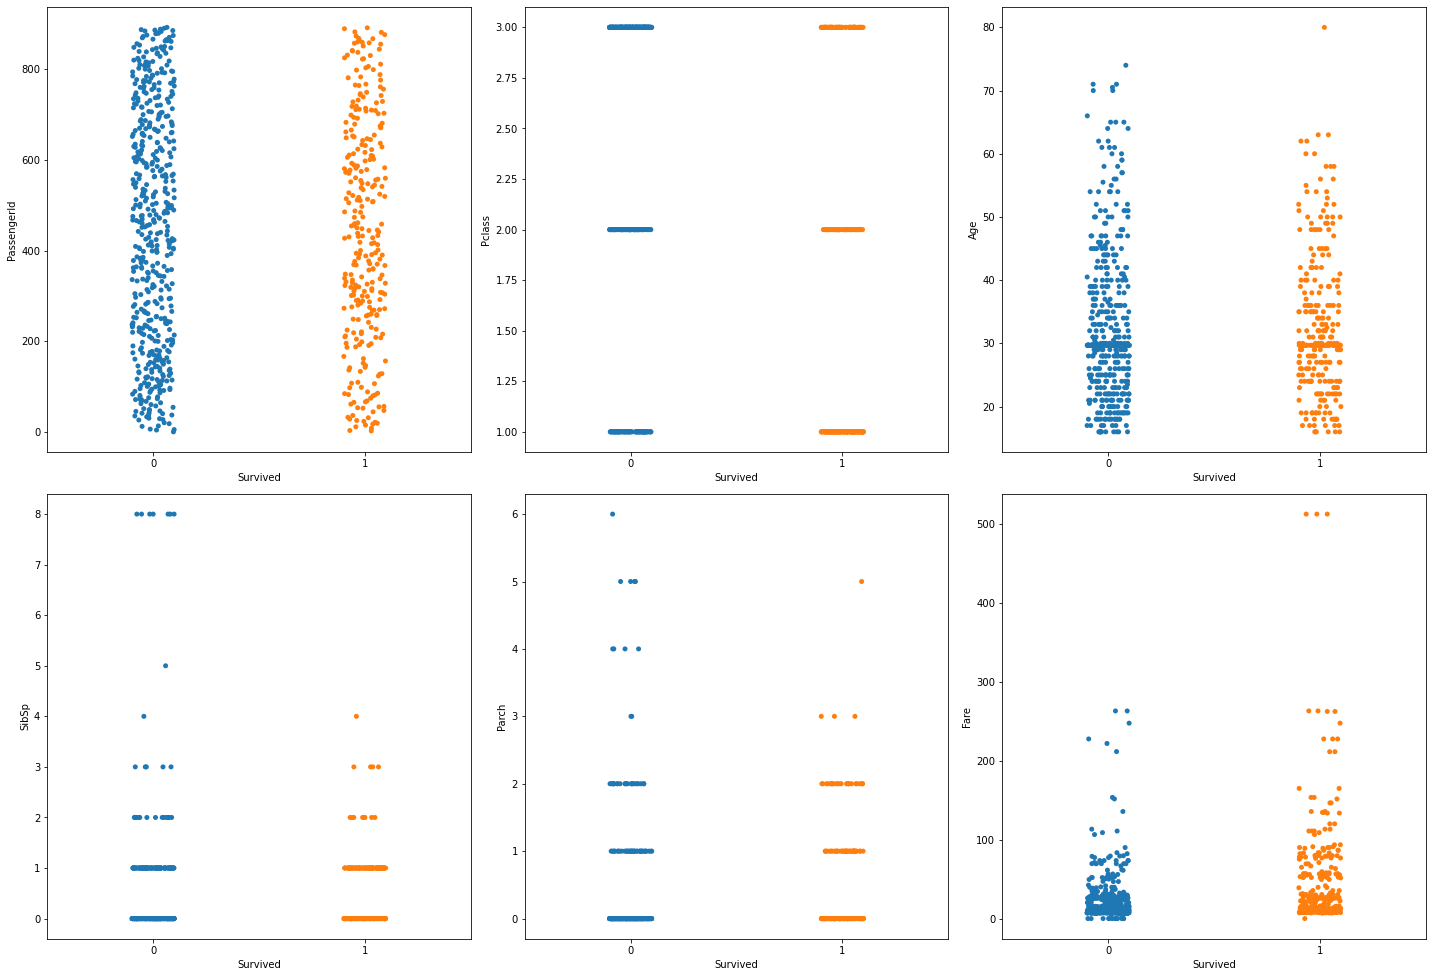

In [593]:
#plotting the strips plot to check for data distribution after managing the outliers and skewness:
plt.figure(figsize=(20,20),facecolor='white')
pltnum=1

for column in x.iloc[:,[0,1,3,4,5,6]]:
    if pltnum <= 9:
        plt.subplot(3,3,pltnum)
        sns.stripplot(y,x[column])
      #  plt.xlabel(column,fontsize=15)
    pltnum+=1
plt.tight_layout()

In [594]:
#as we can see using strip plot the relation between features and target looks normal,

In [595]:
#x_value=x[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]
#x_value.head()

In [596]:
#usind the scalar to scale the features
#col_names=['PassengerId','Pclass','Age','SibSp','Parch','Fare']
#features=x[col_names]

In [597]:
scalar=StandardScaler()
x_data=scalar.fit_transform(x)

In [598]:
x.shape

(807, 10)

In [599]:
#using vif to check the multicolliniarity issue,
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif['features']=x.columns

In [600]:
vif.iloc[:,:7]

,vif,features
0,1.006551,PassengerId
1,1.783783,Pclass
2,1.156376,Sex
3,1.159344,Age
4,1.181991,SibSp
5,1.254249,Parch
6,1.653228,Fare
7,inf,Embarked_C
8,inf,Embarked_Q
9,inf,Embarked_S


In [601]:
x_data.shape
#shape of the dataframe

(807, 10)

In [529]:
#as we can see there is no multicolliniarity issue between features as the score of all the features is less than 5.

In [647]:
df['Survived'].value_counts()

0    515
1    292
Name: Survived, dtype: int64

In [ ]:
#here the target outputs looks normal,there is not compasalary to perform the upsampling.

In [626]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.25,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 88.61%
The Best Random State is : 155


In [627]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.25,random_state=155)

In [628]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 80.69%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       135
           1       0.71      0.72      0.71        67

    accuracy                           0.81       202
   macro avg       0.78      0.78      0.78       202
weighted avg       0.81      0.81      0.81       202
 

=========Confusion Matrix============
[[115  20]
 [ 19  48]]


In [629]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 84.65%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       135
           1       0.77      0.76      0.77        67

    accuracy                           0.85       202
   macro avg       0.83      0.83      0.83       202
weighted avg       0.85      0.85      0.85       202
 

=========Confusion Matrix============
[[120  15]
 [ 16  51]]


In [630]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

svc=SVC()
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 84.65%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       135
           1       0.80      0.72      0.76        67

    accuracy                           0.85       202
   macro avg       0.83      0.81      0.82       202
weighted avg       0.84      0.85      0.84       202
 

=========Confusion Matrix============
[[123  12]
 [ 19  48]]


In [631]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 86.14%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       135
           1       0.84      0.72      0.77        67

    accuracy                           0.86       202
   macro avg       0.86      0.82      0.84       202
weighted avg       0.86      0.86      0.86       202
 

=========Confusion Matrix============
[[126   9]
 [ 19  48]]


In [632]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 83.66%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       135
           1       0.77      0.73      0.75        67

    accuracy                           0.84       202
   macro avg       0.82      0.81      0.81       202
weighted avg       0.84      0.84      0.84       202
 

=========Confusion Matrix============
[[120  15]
 [ 18  49]]


In [633]:
#Now checking the Overfitting of the all the models using cross_val_score.

In [549]:
from sklearn.model_selection import cross_val_score

In [634]:
print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_data,y,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_data,y,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_data,y,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVC========================')
cvs_svc=cross_val_score(svc,x_data,y,cv=5)
print(f"Cross validation for the SVC Classifier is: {cvs_svc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_svc=cross_val_score(knn,x_data,y,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svc.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 79.81%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 74.23%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 72.87%


===================Cross Validation Score of SVC========================
Cross validation for the SVC Classifier is: 81.04%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 80.30%



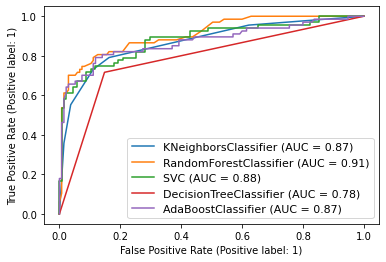

In [637]:
#Plotting and combining all the AUC:

dist=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(svc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(dt,x_test,y_test,ax=dist.ax_)
plot_roc_curve(abc,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
#here we can see that the RandomForest Classifier provide the highst AUC i.e 91%
#we select the RandomForest Classifier for the Hyper parameter tuning 

In [638]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'criterion':['gini','entropy'],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [639]:
gridcv=GridSearchCV(rfc,param_grid=best_param)

In [640]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [641]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 80}

In [643]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
rfc=RandomForestClassifier(criterion= 'gini',max_depth= 10,min_samples_leaf=6,min_samples_split=3,n_estimators= 80)
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 86.14%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       135
           1       0.85      0.70      0.77        67

    accuracy                           0.86       202
   macro avg       0.86      0.82      0.84       202
weighted avg       0.86      0.86      0.86       202
 

=========Confusion Matrix============
[[127   8]
 [ 20  47]]


In [644]:
print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_data,y,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 81.53%



In [ ]:
#after the Hyper parameter tuning also accuracy remains same.so we are saving this model.
#here Random Forest Classifier is our best model to provide the highest accuracy.

In [646]:
import joblib
joblib.dump(rfc,'Titanic_model.pkl')

['Titanic_model.pkl']

In [ ]:
#this complete our model building.